In [21]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("drive/MyDrive/CMSC396H/returns_and_weather.csv")
df

,Unnamed: 0,YYYY-MM,TICKER,RET,cpiret,"Fort Worth, TX","Audbon, IA","Neosho, MO",Real RET
0,0,2000-01,TSN,-0.157692,0.002971,50.6,23.2,34.2,-0.160663
1,1,2000-01,ADM,-0.030928,0.002971,50.6,23.2,34.2,-0.033899
2,2,2000-02,TSN,-0.243653,0.005924,57.3,30.4,44.7,-0.249577
3,3,2000-02,ADM,-0.139362,0.005924,57.3,30.4,44.7,-0.145286
4,4,2000-03,TSN,0.078788,0.008245,61.0,41.7,49.8,0.070543
...,...,...,...,...,...,...,...,...,...
735,735,2020-11,TSN,0.147038,-0.000611,60.4,40.9,52.5,0.147649
736,736,2020-11,ADM,0.084126,-0.000611,60.4,40.9,52.5,0.084737
737,737,2020-12,TSN,-0.011656,0.000941,49.0,25.4,41.0,-0.012597
738,738,2020-12,ADM,0.012859,0.000941,49.0,25.4,41.0,0.011918


In [23]:
df['avg tmp'] = (df['Fort Worth, TX'] + df['Audbon, IA'] + df['Neosho, MO'])/3
df

,Unnamed: 0,YYYY-MM,TICKER,RET,cpiret,"Fort Worth, TX","Audbon, IA","Neosho, MO",Real RET,avg tmp
0,0,2000-01,TSN,-0.157692,0.002971,50.6,23.2,34.2,-0.160663,36.000000
1,1,2000-01,ADM,-0.030928,0.002971,50.6,23.2,34.2,-0.033899,36.000000
2,2,2000-02,TSN,-0.243653,0.005924,57.3,30.4,44.7,-0.249577,44.133333
3,3,2000-02,ADM,-0.139362,0.005924,57.3,30.4,44.7,-0.145286,44.133333
4,4,2000-03,TSN,0.078788,0.008245,61.0,41.7,49.8,0.070543,50.833333
...,...,...,...,...,...,...,...,...,...,...
735,735,2020-11,TSN,0.147038,-0.000611,60.4,40.9,52.5,0.147649,51.266667
736,736,2020-11,ADM,0.084126,-0.000611,60.4,40.9,52.5,0.084737,51.266667
737,737,2020-12,TSN,-0.011656,0.000941,49.0,25.4,41.0,-0.012597,38.466667
738,738,2020-12,ADM,0.012859,0.000941,49.0,25.4,41.0,0.011918,38.466667


In [24]:
ADM_df = df.loc[df['TICKER'] == 'ADM']
ADM_df

,Unnamed: 0,YYYY-MM,TICKER,RET,cpiret,"Fort Worth, TX","Audbon, IA","Neosho, MO",Real RET,avg tmp
1,1,2000-01,ADM,-0.030928,0.002971,50.6,23.2,34.2,-0.033899,36.000000
3,3,2000-02,ADM,-0.139362,0.005924,57.3,30.4,44.7,-0.145286,44.133333
5,5,2000-03,ADM,0.024845,0.008245,61.0,41.7,49.8,0.016600,50.833333
6,6,2000-04,ADM,-0.036364,0.000584,65.3,46.7,55.8,-0.036948,55.933333
9,9,2000-05,ADM,0.206289,0.001168,76.6,61.9,66.1,0.205121,68.200000
...,...,...,...,...,...,...,...,...,...,...
726,726,2020-08,ADM,0.053467,0.003153,86.0,70.9,76.3,0.050314,77.733333
728,728,2020-09,ADM,0.038651,0.001393,74.7,60.6,69.7,0.037258,68.333333
731,731,2020-10,ADM,-0.005378,0.000415,65.0,44.4,56.5,-0.005793,55.300000
736,736,2020-11,ADM,0.084126,-0.000611,60.4,40.9,52.5,0.084737,51.266667


In [25]:
BG_df = df.loc[df['TICKER'] == 'BG']
BG_df

,Unnamed: 0,YYYY-MM,TICKER,RET,cpiret,"Fort Worth, TX","Audbon, IA","Neosho, MO",Real RET,avg tmp
40,40,2001-08,BG,0.056871,0.000000,84.9,47.00122,78.8,0.056871,70.233740
43,43,2001-09,BG,-0.068493,0.004507,74.7,59.30000,67.3,-0.073000,67.100000
47,47,2001-10,BG,0.036471,-0.003365,65.0,48.80000,56.9,0.039836,56.900000
50,50,2001-11,BG,0.103575,-0.001688,59.7,46.40000,51.4,0.105263,52.500000
52,52,2001-12,BG,0.203101,-0.003946,49.5,29.70000,39.8,0.207047,39.666667
...,...,...,...,...,...,...,...,...,...,...
725,725,2020-08,BG,0.061694,0.003153,86.0,70.90000,76.3,0.058541,77.733333
729,729,2020-09,BG,0.001754,0.001393,74.7,60.60000,69.7,0.000361,68.333333
732,732,2020-10,BG,0.241357,0.000415,65.0,44.40000,56.5,0.240942,55.300000
734,734,2020-11,BG,0.046889,-0.000611,60.4,40.90000,52.5,0.047500,51.266667


In [26]:
TSN_df = df.loc[df['TICKER'] == 'TSN']
TSN_df

,Unnamed: 0,YYYY-MM,TICKER,RET,cpiret,"Fort Worth, TX","Audbon, IA","Neosho, MO",Real RET,avg tmp
0,0,2000-01,TSN,-0.157692,0.002971,50.6,23.2,34.2,-0.160663,36.000000
2,2,2000-02,TSN,-0.243653,0.005924,57.3,30.4,44.7,-0.249577,44.133333
4,4,2000-03,TSN,0.078788,0.008245,61.0,41.7,49.8,0.070543,50.833333
7,7,2000-04,TSN,-0.061798,0.000584,65.3,46.7,55.8,-0.062382,55.933333
8,8,2000-05,TSN,-0.050060,0.001168,76.6,61.9,66.1,-0.051228,68.200000
...,...,...,...,...,...,...,...,...,...,...
727,727,2020-08,TSN,0.028804,0.003153,86.0,70.9,76.3,0.025651,77.733333
730,730,2020-09,TSN,-0.052866,0.001393,74.7,60.6,69.7,-0.054259,68.333333
733,733,2020-10,TSN,-0.037828,0.000415,65.0,44.4,56.5,-0.038243,55.300000
735,735,2020-11,TSN,0.147038,-0.000611,60.4,40.9,52.5,0.147649,51.266667


[0.03031045] [[-0.00036356]] 0.005363714450592361
[0.02799034] [[-0.00032271]] 0.0035803553857071124
[0.05794285] [[-0.00084046]] 0.021051372186890682


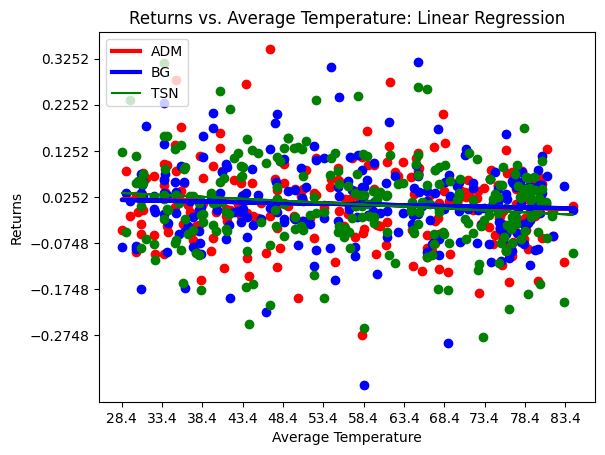

In [27]:
#First 3 Models: Linear Regression
x1 = np.asarray(ADM_df['avg tmp'])
y1 = np.asarray(ADM_df['Real RET'])
x1 = x1.reshape(len(x1), 1)
y1 = y1.reshape(len(y1), 1)
regr = linear_model.LinearRegression()
regr.fit(x1, y1)
print(regr.intercept_, regr.coef_, regr.score(x1, y1))
plt.scatter(x1, y1, color='red')
plt.plot(x1, regr.predict(x1), color='red', linewidth=3, label='ADM')

x2 = np.asarray(BG_df['avg tmp'])
y2 = np.asarray(BG_df['Real RET'])
x2 = x2.reshape(len(x2), 1)
y2 = y2.reshape(len(y2), 1)
regr = linear_model.LinearRegression()
regr.fit(x2, y2)
print(regr.intercept_, regr.coef_, regr.score(x2, y2))
plt.scatter(x2, y2, color='blue')
plt.plot(x2, regr.predict(x2), color='blue', linewidth=3, label='BG')

x3 = np.asarray(TSN_df['avg tmp'])
y3 = np.asarray(TSN_df['Real RET'])
x3 = x3.reshape(len(x3), 1)
y3 = y3.reshape(len(y3), 1)
regr = linear_model.LinearRegression()
regr.fit(x3, y3)
print(regr.intercept_, regr.coef_, regr.score(x3, y3))
plt.scatter(x3, y3, color='green')
plt.plot(x3, regr.predict(x3), color='green', label='TSN')

plt.legend(loc="upper left")
plt.xlabel('Average Temperature')
plt.ylabel('Returns')
plt.title('Returns vs. Average Temperature: Linear Regression')
plt.xticks(np.arange(min(x1), max(x1), 5))
plt.yticks(np.arange(min(y1), max(y1), 0.1))
plt.show()